In [ ]:
# Preable Package Loading
library(repr)

<h1>Unit 4 Live Session </center> </h1>
<h3> W203 Instructional Team </h3>

<h2> Random Variables </h2>
<center>![title](baby.jpg)</center>

<h3> Class Announcements </h3>
1. Announcement 1
2. Announcement 2
3. Announcement 3

<h3> 1 Random Variables Group Discussion </h3>

** Experiment 1: ** You have written the letters A through G on 7 seperate slips of paper and put them in a hat. Suppose further that after you have mixed up those piece of paper you ask someone to close their eyes and blindly choose one slip of paper out of the hat. The person then shows you the slip of paper with which you generate a number according to the following. 

$$ 
X = 
\begin{cases} 
    1 &  \text{if shown  A } \\
    10 & \text{if shown B or C } \\
    20 & \text{if shown D or E or F } \\
    2  & \text{if shown  G }
\end{cases}
$$



**1.1** Is $X$ a random variable? If so how would you further categorize it? Either way give a definition of what a random variable is to you. 

> X is a random variable, in particular it is a discrete random variable. 

> Dispensing with it's terse definition, in words a random variable is a mapping from a random/uncertain input to a set of numerical outputs in such a way that you can trace every output back to a set of inputs that could have generated it.  

**1.2 ** Suppose you then define $Y = X^2$, is $Y$ a random variable? How about any function $f(X)$? Is your definition too narrow to include $Y$ and/or $f(X)$?

> By the definition above any function of a random variable is a random variable. 

<h3> 2 Modeling A Fair Die </h3>

The range of a discrete random variable is a discrete set of real numbers, $O$.  Much of the time, the range will simply be a finite set of numbers. For any value k in the range, $0 \leq P(X=k) \leq 1$. The sum over all values k in the range is 1, i.e. $\sum_{k \in O} P(X=k)=1$.

The expected value (or population mean) of a discrete random variable X is the weighted average of the values in the range of X.
$$E(X) = \sum_{k \in O} k \cdot P(X=k)$$

One very useful feature of R is its ability to generate random numbers from a wide variety of distributions.

**2.1** How can we represent a fair (six-sided) die in R? Do so ... 

In [78]:
(die <- 1:6)
(p.die <- rep(1/6,6))

[1] 1 2 3 4 5 6

[1] 0.1666667 0.1666667 0.1666667 0.1666667 0.1666667 0.1666667

**2.2** Let the $X$ represent the result of one role of a 6 sided die use R to Find the expected value of $X$.

In [79]:
sum(die*p.die)

[1] 3.5

**2.3** Simulate rolling the die 10 times, plot the result, and compute the sample mean.

[1] 4

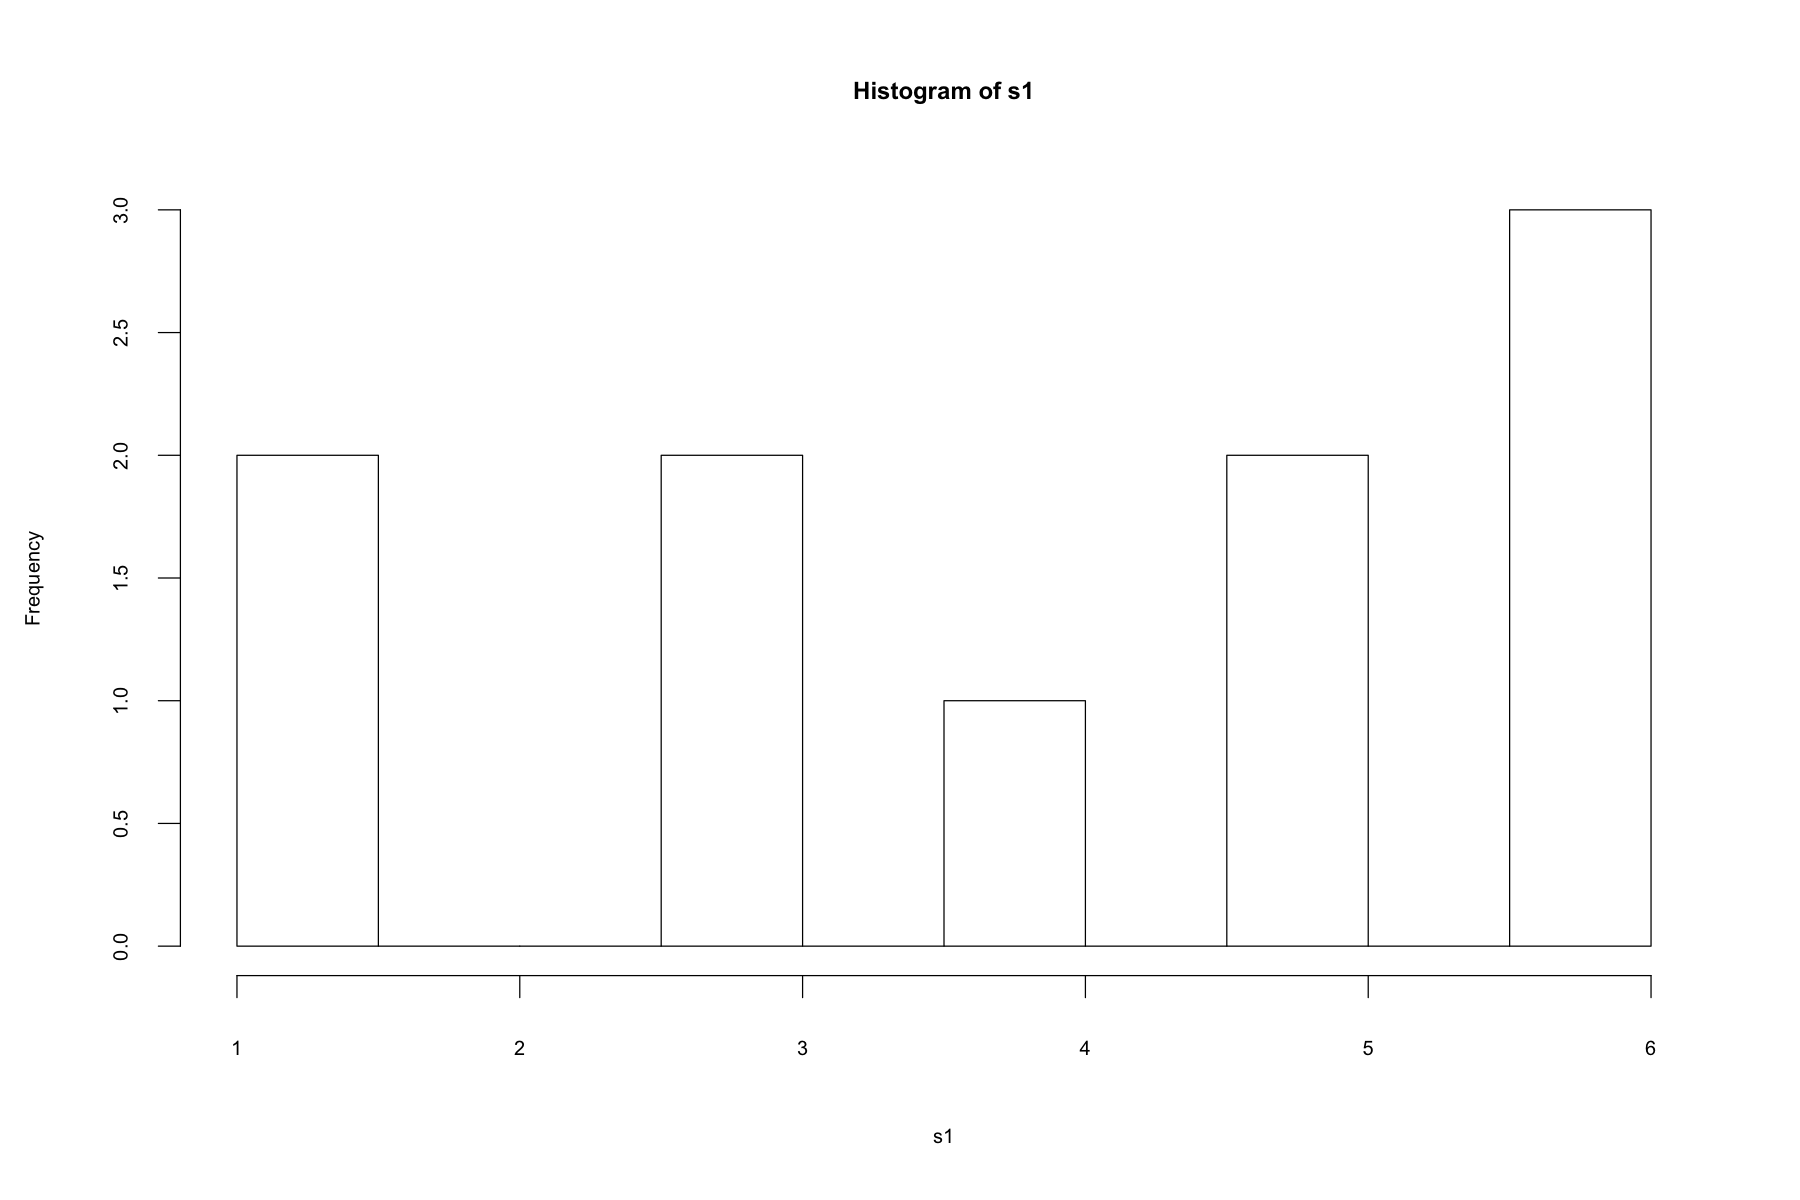

In [80]:
options(repr.plot.height = 10, repr.plot.width = 15)
s1 <- sample(die, size=10, prob=p.die, replace=T)
mean(s1)
hist(s1,breaks = 12)

**2.4** Simulate rolling the die 1000 times, plot the result, and compute the sample mean.

[1] 3.485

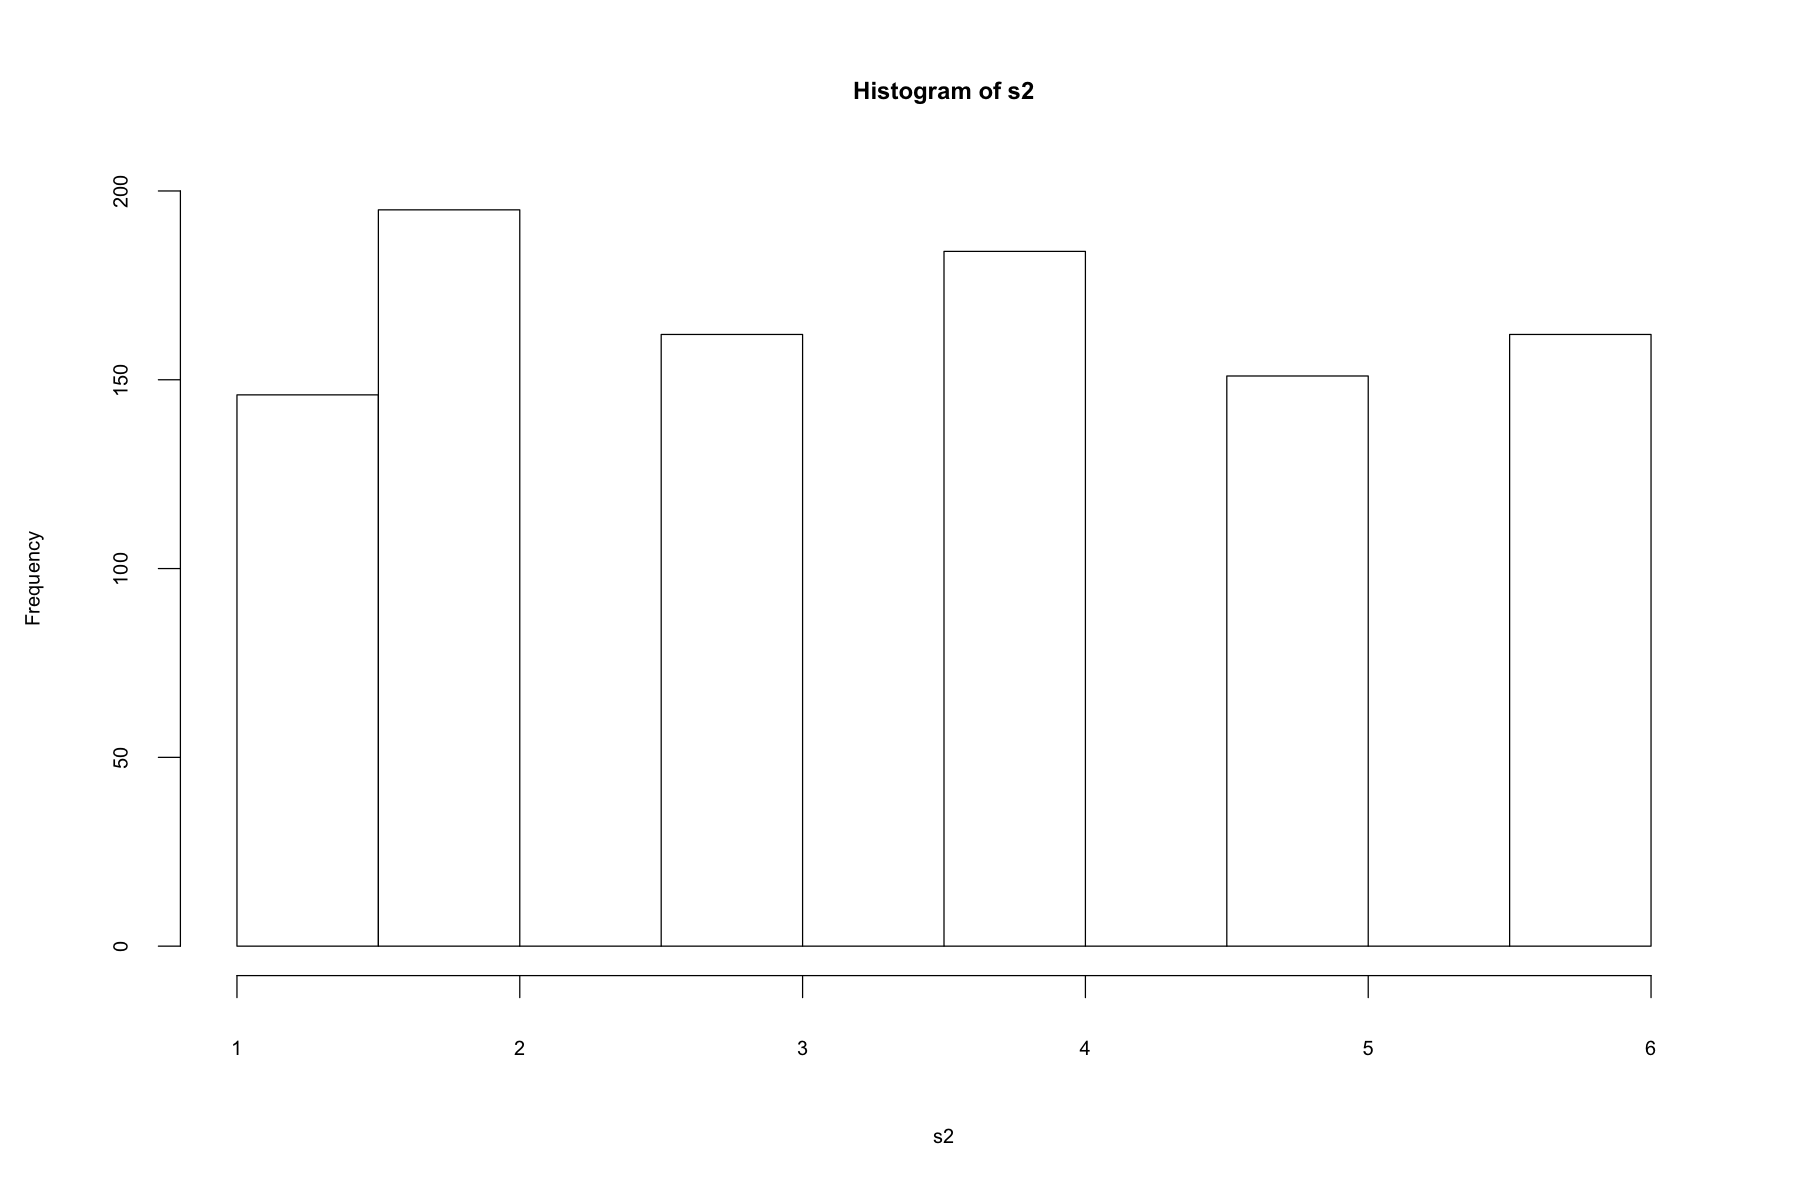

In [81]:
options(repr.plot.height = 10, repr.plot.width = 15)
s2 <- sample(die, size=1000, prob=p.die, replace=T)
mean(s2)
hist(s2)

**2.5** Compare the result of 2.3 with the results of 2.4, which mean value is closer to $E(X)$

> The mean of 1000 samples is closer to the $E(X)$ than the mean of 10 samples, this is no coincidence as we will when we study the law of large numbers and the central limit theorem. 

> You can see this convergence visually

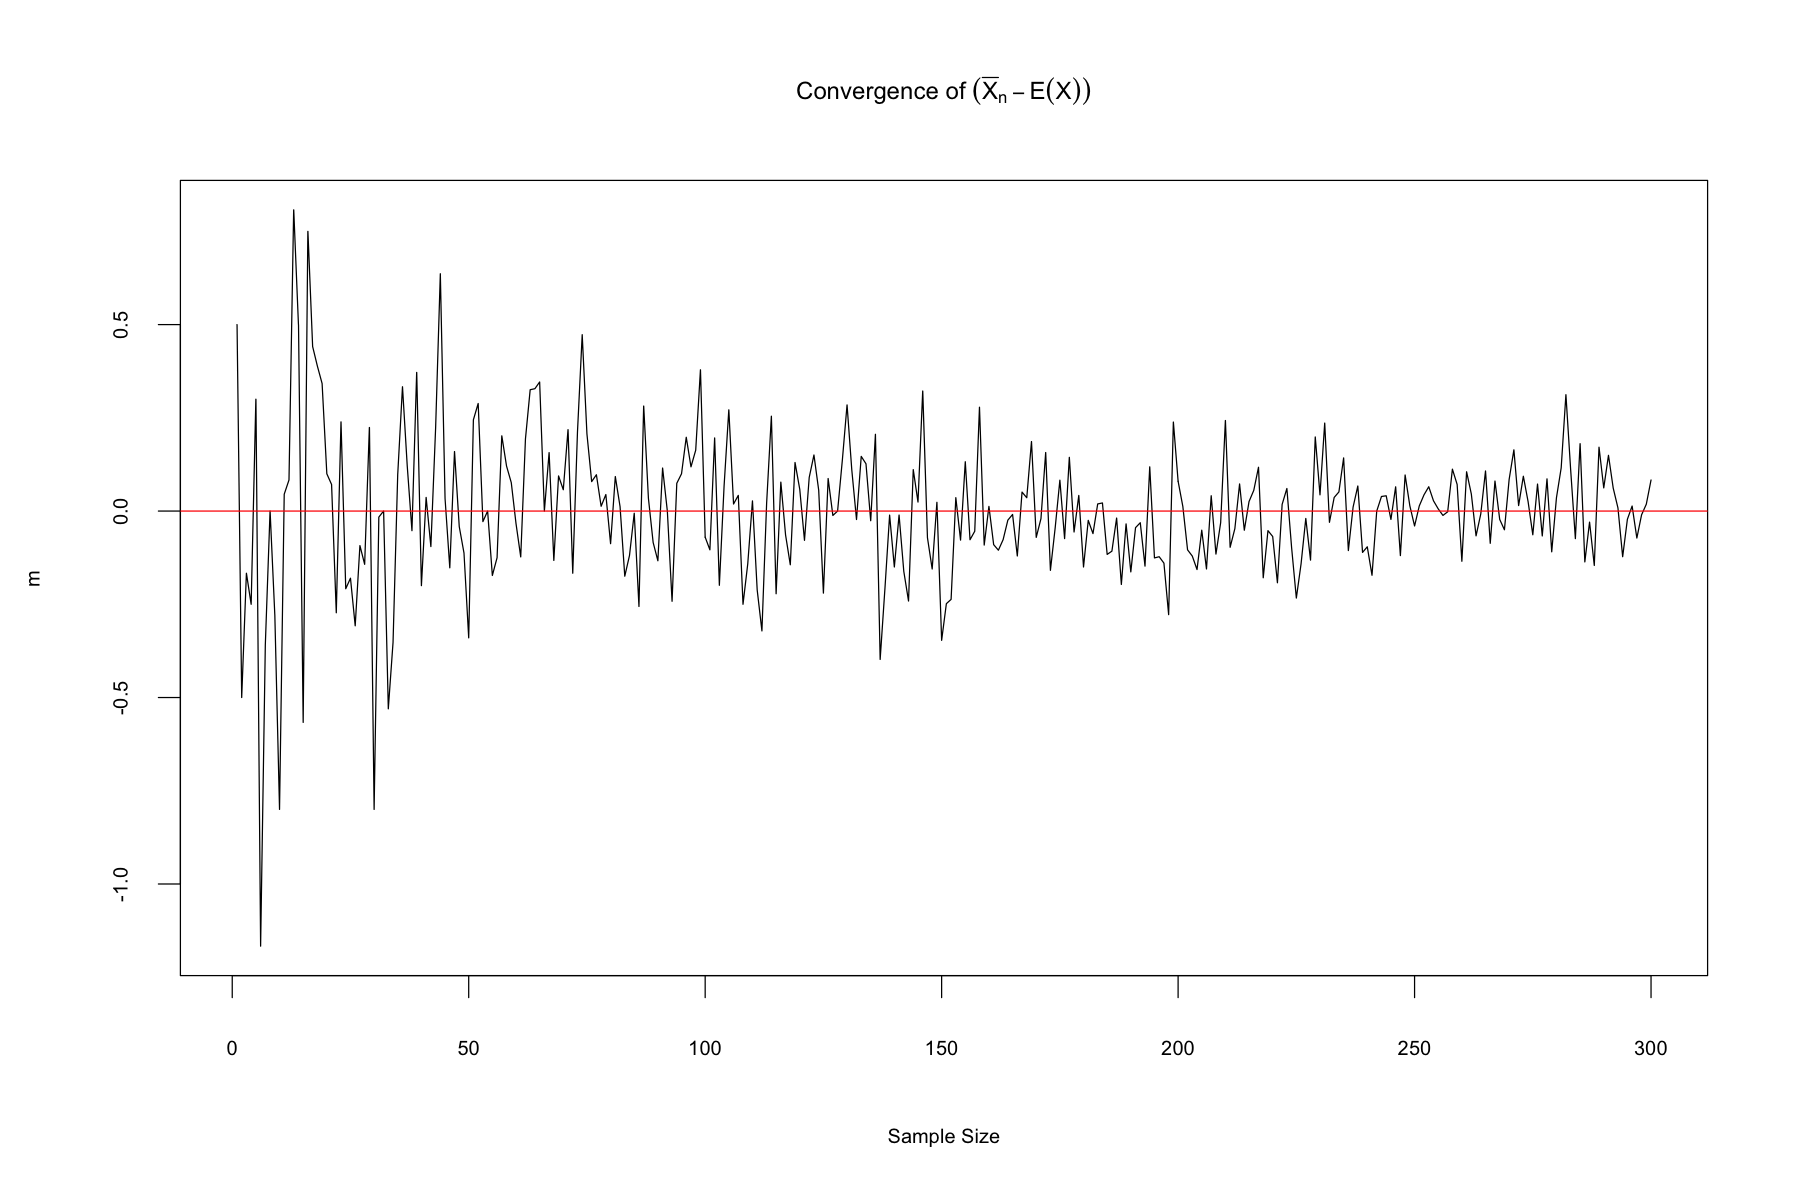

In [82]:
m =c()
for (i in seq(1:300)) {
    m[i] <- mean(sample(die, size=i, prob=p.die, replace=T)-3.5)
    }
plot(m,type = 'l',main = expression(paste("Convergence of ", (bar(X)[n] - E(X)))),xlab = 'Sample Size')
abline(h = 0, col = "red")

> One can see that the values of $\overline{X}_n - E(X)$ are generally closer to zero as the sample size increases.

> Looking at the graph above you may be wonder if there is some way to quantify how "fast" $\overline{X}_n - E(X)$ converges to zero, the details are complicated but this is usually done by finding a sequence of numbers $\{a_n\}_{n=1}^\infty$ so that 

$$a_n(\overline{X}_n -E(X))$$

> neither *converges* to zero nor *diverges* to $\infty$ 

> It turns out that under very general conditions the sequence is $a_n = \sqrt{n}$ as shown below.

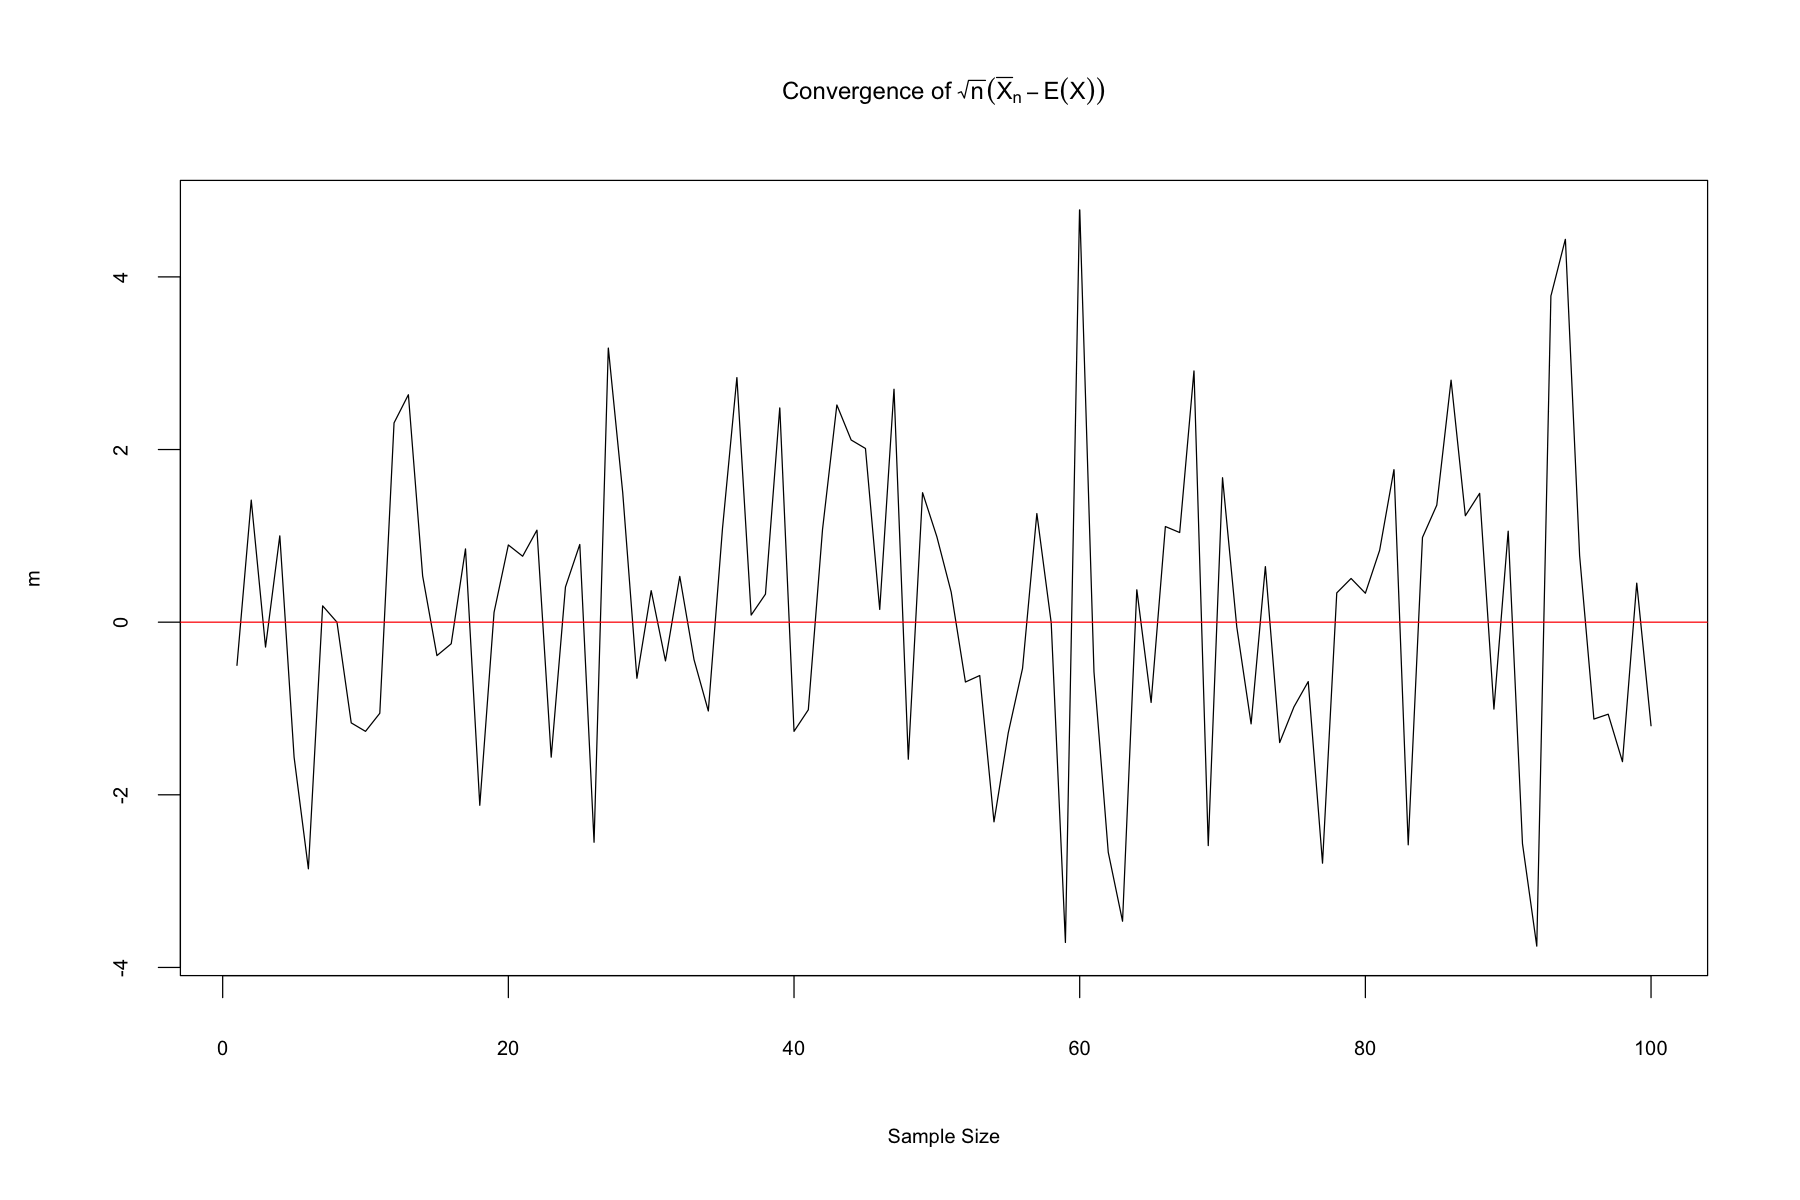

In [83]:
m =c()
for (i in seq(1:100)) {
    m[i] <- mean(sqrt(i)*(sample(die, size=i, prob=p.die, replace=T)-3.5))
    }
plot(m,type = 'l',main= expression(paste("Convergence of ",sqrt(n) (bar(X)[n] - E(X)))),xlab = 'Sample Size')
abline(h = 0, col = "red")

<h3> 3 Modeling a (Possibly) Fair Coin </h3>

Suppose you have a fair coin. With each flip, the coin can land on heads or tails (we will assume that the coin will not land on its side for the purposes of this example). 

**3.1** How can we represent these possible outcomes of the coin in R? Do so.. 

In [5]:
coin <- c("head","tail")

**3.2** How can we represent the outcome of a random experiment, in which you flip the coin 10 times?  Run such a simulation and report the number of heads.

In [6]:
s <- sample(coin, 10,replace=T)
count <- function(x, n){ length((which(x == n))) }
count(s,"head")

[1] 5

**3.3** What if the coin is not fair? Repeat your experiment assuming the probability the coin will land Heads is 30% and Tails 70%.  How many heads do you get?

In [7]:
S <-  sample(c("head","tail"), 10, prob=c(0.3,0.7),replace=T)
             as.data.frame(table(S))

S,Freq
head,3
tail,7


**3.4** What would we expect value of the proporiton of heads to total coin tosses to be in the limit as the number of tosses approaches infinity?

> We expect that the value of the proportion of heads to total coin tosses approach the probability of a heads $0.3$ as $n \rightarrow \infty$

<h3> 4 The 'Pyramid' Distribution </h3>

Suppose a continuous random $X$ variable has the following PDF.

$$f_X(x)=\begin{cases} x, & 0 \leq x < 1 \\ 2 - x, & 1 \leq x < 2 \\ 0, & \text{otherwise} \end{cases}$$

** 4.1 ** Plot the probability density function of X

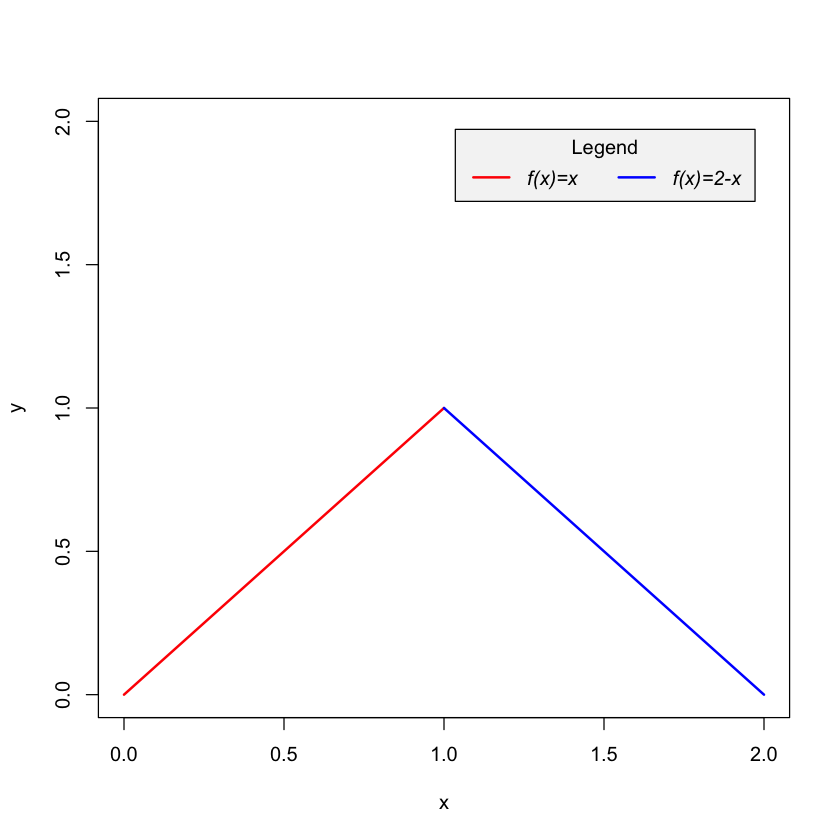

In [8]:
x1 <- seq(0,1,0.1)
x2 <- seq(1,2,0.1)
y1 <- x1
y2 <- 2-x2
plot(c(0,2), c(0,2), type="n", xlab="x", ylab="y")
lines(x1, y1, col="red", lwd=2)
lines(x2, y2, col="blue", lwd=2)
legend("topright",
       inset=.05,
       cex = 1,
       title="Legend",
       c("f(x)=x","f(x)=2-x"),
       horiz=TRUE,
       lty=c(1,1),
       lwd=c(2,2),
       col=c("red","blue"),
       bg="grey96",
       text.font=3)

** 4.2 ** Find the cumulative distribution function of $X$ and plot it.

> $$\text{For }x \in (0,1), F_X(x) = \int_{0}^{x} {f_x}(u)du = {x}^2/2 $$

> $$\text{For } x \in (1,2), F_X(x) = \int_{0}^{1} {f_x}(x)dx + \int_{1}^{x} {f_x}(u)du = \int_{0}^{1} u du + \int_{1}^{x} (2-u) du = \left[\frac{u^2}{2}\right]_0^1 + \left[2u-\frac{u^2}{2}\right]_1^x =  \frac{1}{2} + 2x - \frac{1}{2}x^2$$

> $$F_X(x)=\begin{cases} 0, & x < 0 \\ \frac{x^2}{2}, & 0 \leq x < 1 \\  \frac{1}{2} + 2x - \frac{1}{2}x^2, & 1 \leq x < 2 \\ 1, &  2 < x \end{cases}$$

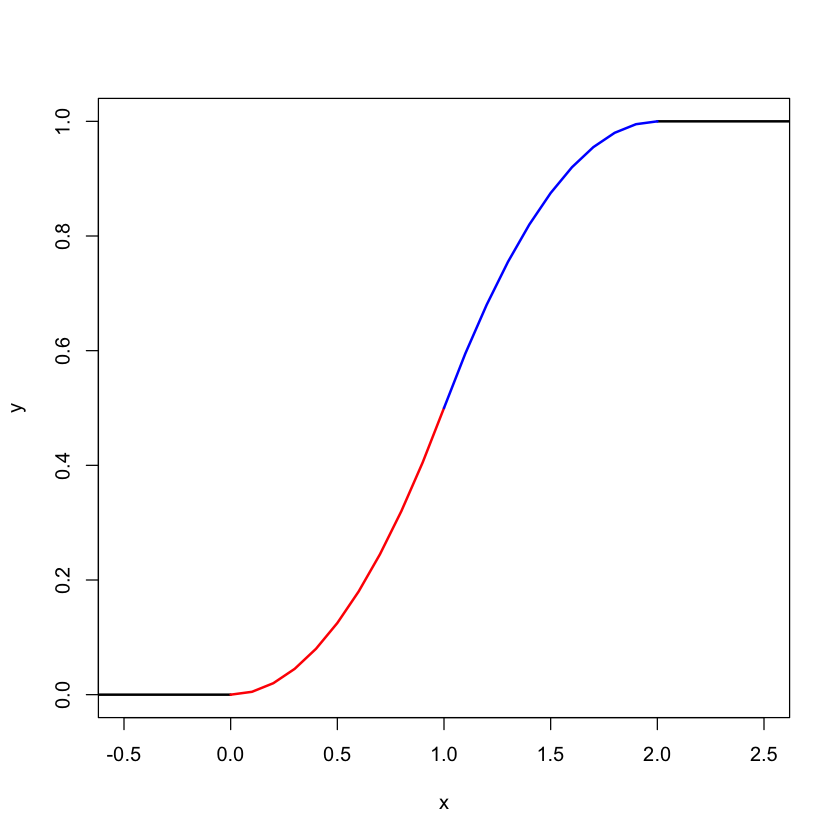

In [9]:
x0 <- seq(-1,0,0.1)
x1 <- seq(0,1,0.1)
x2 <- seq(1,2,0.1)
x3 <- seq(2,3,0.1)
y0 <- 0*x0
y1 <- (x1*x1)/2
y2 <- 2*x2 - ((x2^2)/2)-1
y3 <- (0*x3)+1

plot(c(-0.5,2.5), c(0,1), type="n", xlab="x", ylab="y")

lines(x0, y0, lwd=2)
lines(x3, y3, lwd=2)
lines(x1, y1, col="red", lwd=2)
lines(x2, y2, col="blue", lwd=2)

** 4.3 ** Compute the expectation of $X$.

> $$E(X) = \int_{0}^{1} x{f_x}(x)dx + \int_{1}^{2} x{f_x}(x)dx =
 \int_{0}^{1} {x^2}dx + \int_{1}^{2} (2x-x^2)dx = \left[\frac{1}{3}x^3\right]_0^1+  \left[x^2-\frac{1}{3}x^3\right]_1^2 = 1
$$

** 4.4 ** Prove that the expectation of any random variable with a PDF that's symmetric around  $k$ is $k$.


> Suppose $Y$ is any random variable with PDF $f_Y$ that's symmetric around $k$.  This means that for any $v$, $f_Y(k-v) = f_Y(k+v)$.


>The expectation we want is

>$$ E(Y) = \int_{-\infty}^\infty y f_Y(y) dy $$.

> To compute this, we start with a (very simple) variable substitution.  Let $y = k + z$.  We can then write our integral as,

>$$ E(Y) = \int_{-\infty}^\infty (k+z) f_Y(k+z) dz $$
$$ = k \int_{-\infty}^\infty f_Y(k+z) dz + \int_{-\infty}^\infty z f_Y(k+z) dz  $$

> Notice that the left integral is just the integral of a probability density function, so its value is 1.  Therefore,

> $$ E(Y) =  k + \int_{-\infty}^\infty z f_Y(k+z) dz  $$

> We can break the right integral into a term for $z<0$ and a term for $z>0$:

> $$E(Y) = k + \int_{-\infty}^0 z f_Y(k+z) dz + \int_0^\infty z f_Y(k+z) dz $$

> To show that the two integrals cancel each other out, we need to change variables again.  Let z = -v.  Notice that when we do this, we get a $-1$ from the substitution, another $-1$ from $dz/dv = -1$, and a final $-1$ from switching the bounds of integration:

> $$ \int_{-\infty}^0 z f_Y(k+z) dz = \int_\infty^0 (-v) f_Y(k-v) (-1) dv 
= - \int_0^\infty v f_Y(k-v) dv $$

> We know, however, that $f_Y(k-v) = f_Y(k+v)$.  Substituting in and switching our integration variable back to z, this integral therefore equals,

> $$  - \int_0^\infty v f_Y(k+v) dv =  - \int_0^\infty z f_Y(k+z) dz  $$

> Subsituting back in above, we have,

> $$E(Y) = k - \int_0^\infty z f_Y(k+z) dz + \int_0^\infty z f_Y(k+z) dz = k $$

** 4.5 ** Compute the variance of $X$.

> $$
Var(X) = E[X^2]-(E[X]^2) = \int_{-\infty}^{\infty} x^2{f_x}(x)dx - 1
$$
$$
Var(X) = \int_{0}^{1} x^2{f_x}(x)dx +\int_{1}^{2} x^2{f_x}(x)dx = \int_{0}^{1} {x^3}dx + \int_{1}^{2} (2x^2-x^3)dx - 1
$$
$$
Var(X) = \left[\frac{1}{4}x^4\right]_0^1+  \left[\frac{2}{3}x^3-\frac{1}{4}x^4\right]_1^2 -1 = \frac{1}{4}+\frac{16}{3}-\frac{16}{4}-\frac{2}{3}+\frac{1}{4} -1 = \frac{14}{3}-\frac{14}{4} -1  = \frac{56-42}{12} -1 = \frac{1}{6}
$$


<h3> 5 Exponential Decay </h3>

Suppose that the lifespan of a radioactive element is a random variable, $X$, with the following probability density function.

$$ f_X(x) = \begin{cases} ce^{-2x} , &x \geq 0
\\ 0, &x < 0 \end{cases}$$

where $c$ is some constant.

** 5.1 ** Compute the constant $c$.

>$$
F_X(x) = \int_{0}^{\infty} ce^{-2x}dx = 1
$$
$$
F_X(x) = c \int_{0}^{\infty} e^{-2x}dx = c \left[-\frac{1}{2}e^{-2x}dx\right]_0^{\infty} = c \frac{1}{2} = 1
$$
$$ c = 2
$$

** 5.2 ** Compute $P(X > 2)$.

> $$ 
P(X > 2) = \int_{2}^{\infty} 2e^{-2x}dx =  \left[-e^{-2x}dx\right]_2^{\infty} = e^{-4}
$$

<h3> 6 Modeling an American Delicacy </h3>

Suppose that the number of calories in a Twinkie is a normally-distributed random variable.Suppose further that 50% of Twinkies have over 100 calories, and 68.2% of Twinkies have calories in the interval from 85 calories to 115 calories. 

**6.1**  What fraction of Twinkies have more than 140 calories? 

** 6.2 ** Use R to simulate the production of 1000 Twinkies.  Plot the result and compute the fraction of Twinkies in your sample that have more than 140 calories.